### Análisis del método de Runge Kutta 2

Empezando con la interpolacion lineal simila al usado en el método de Euler

$$
y_{i + 1} - y_i = h f(x_i, y_i) \newline
y_{i + 1} = y_i + h f(x_i, y_i)
$$

Haciendo una aproximación

$$
f(x_i) = f(x_i, y(x_i)) \approx f(x_{i + \frac{1}{2}}, y_{i + \frac{1}{2}}) + \frac{df}{dx}|_{x = x_{i + \frac{1}{2}}}(x - x_{i+\frac{1}{2}}) + ... 
$$

Usando la aproximación

$$
y_{i+\frac{1}{2}} = f_i(x_{i + \frac{1}{2}} - x_i) + y_i \newline
= f_i\left(\frac{h}{2}\right) + y_i
$$

Entonces 

$$
y_{i + 1} = y_i + h f\left(x_{i + \frac{1}{2}}, y_i + \frac{h}{2}fi\right)
$$

Definimos 

$$

k1 = fi = f(x_i,y_i) \newline

k2 = f \left(x_i + \frac{h}{2},y_i + \frac{h}{2}k_1 \right)

$$

### Implementación del método

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Definicion de la ecuacion diferencial
def df(x, y):
    return np.sin(x)

# Para una dimension
def RK2(df, x0, y0, xmax, h):

    n = int((xmax - x0) / h)
    x_valores = np.linspace(x0, xmax, n + 1)
    y_valores = np.ones(n+1)
    y_valores[0] = y0

    # Iteramos para calcular los valores dadas las condiciones iniciales
    for i in range(n):
        x = x_valores[i]
        y = y_valores[i]                                        #-1
        k1 = df(x, y)
        k2 = df(x + h/2, y + h/2 * k1)
        y_new = y + h * k2
        y_valores[i+1] = y_new

    return x_valores, y_valores

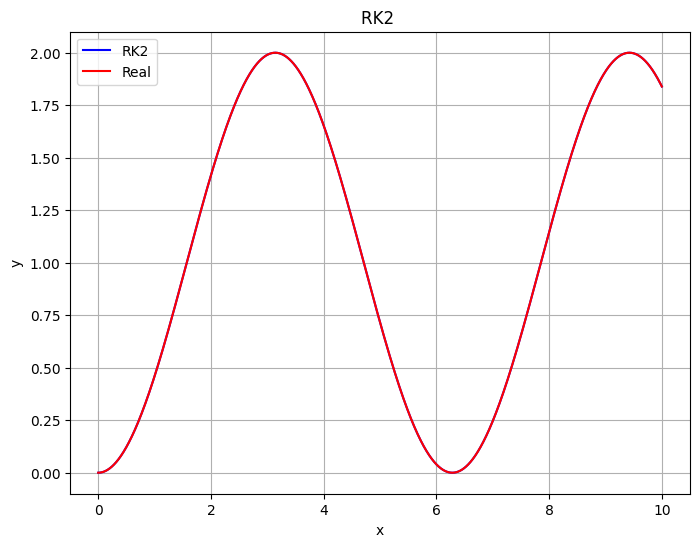

In [21]:
# condiciones iniciales
x0 = 0
y0 = 0

# limite
xmax = 10

# incremento
h = 0.001

# Resolviendo la ecuacion diferencial ordinaria
x_valores, y_valores = RK2(df, x0, y0, xmax, h)

plt.figure(figsize=(8, 6))
plt.plot(x_valores, y_valores, label='RK2', color='blue')
plt.plot(x_valores, -np.cos(x_valores) + 1, label='Real', color='red')
plt.title("RK2 ")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


### Soluciones numéricas para un oscilador acoplado

Obteniendo las soluciones numéricas para un oscilador arménico acoplado con el uso de la función RK2. En este problema se obtuvieron las ecuaciones de movimiento de este sistema usando a la coordenada generalizada $\eta_i = x_i - x_{i0}$. De modo que 

$$\ddot{\eta_1} = -2 \frac{k}{m}\eta_1 + \frac{k}{m}\eta_2 $$
$$\ddot{\eta_2} = -2 \frac{k}{m}\eta_2 + \frac{k}{m}\eta_1 $$

Haciendo un cambio de variable $\dot{u_1} = \ddot{\eta_1} $ y $\dot{u_2} = \ddot{\eta_2}$

Asi podemos resolver un sistema de ecuaciones de primer orden. 

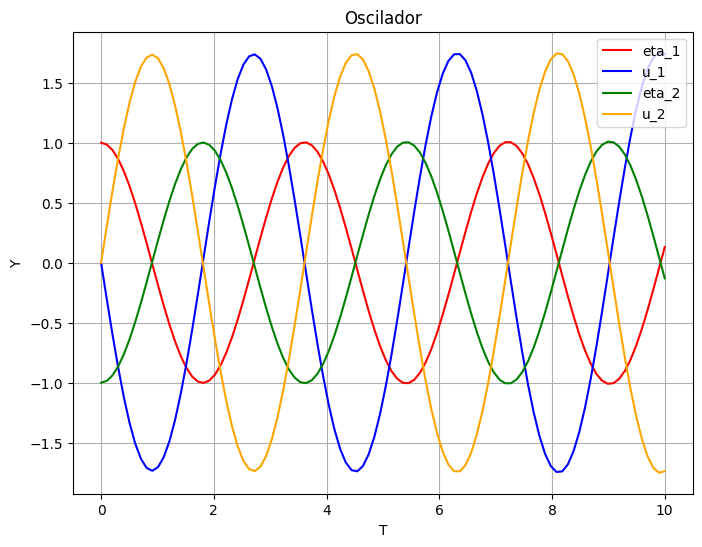

In [22]:
k = 1
m = 1

args = [k, m]

# Definimos la funcion diferencial vectorial 
def dF(X, Y, args):
    eta_1 = Y[0] 
    eta_2 = Y[2]
    u_1 = Y[1] 
    u_2 = Y[3]
    k = args[0]
    m = args[1]
    
    return [u_1, -k/m * (2 * eta_1 - eta_2), u_2,  -k/m * (2 * eta_2 - eta_1)]

# Definimos una funcion que regresa un vector con las condiciones iniciales
def Y_0(eta_1_0, u_1_0, eta_2_0, u_2_0):
    
    Y_0 = np.array([eta_1_0, u_1_0, eta_2_0, u_2_0])
    return Y_0

# Usamos el metodo Runge Kutta 2 implementado en la primera parte de la notebook pero usamos como entrada vectores
def RK2(dF, Y_0, X):

    n = 100
    # n = int((tmax - x0) / h)
    h = X[1] - X[0]
    Y = np.zeros((n,4))
    # Ahora la condicion inicial es un vector
    Y[0] = Y_0

    for i in range(n - 1):                                    
        k1 = dF(X[i], Y[i], args)
        k2 = dF(X[i] + h/2, Y[i] + 1/2 * np.dot(h, k1), args)
        Y[i+1] = Y[i] + np.dot(h, k2)

    return Y

n = 100
T = np.linspace(0, 10, n)
Y_0 = Y_0(1, 0, -1, 0)
Y = RK2(dF, Y_0, T)

plt.figure(figsize=(8, 6))
plt.plot(T, Y[:, 0], label='eta_1', color='red')
plt.plot(T, Y[:, 1], label='u_1', color='blue')
plt.plot(T, Y[:, 2], label='eta_2', color='green')
plt.plot(T, Y[:, 3], label='u_2', color='orange')
plt.title("Oscilador")
plt.xlabel("T")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()